<a href="https://colab.research.google.com/github/Sreelekshmim123/Supervisedlearningalgorithm/blob/main/Logistic_KNN_Naivebayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [3]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [ ]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.set_index("User ID")

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,NaN,19,19000,0
15810944,NaN,35,20000,0
15668575,NaN,26,43000,0
15603246,NaN,27,57000,0
15804002,NaN,19,76000,0
...,...,...,...,...
15691863,NaN,46,41000,1
15706071,NaN,51,23000,1
15654296,NaN,50,20000,1


In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,0
1,15810944,NaN,35,20000,0
2,15668575,NaN,26,43000,0
3,15603246,NaN,27,57000,0
4,15804002,NaN,19,76000,0
...,...,...,...,...,...
395,15691863,NaN,46,41000,1
396,15706071,NaN,51,23000,1
397,15654296,NaN,50,20000,1
398,15755018,NaN,36,33000,0


Map function

In [ ]:
data["Gender"]=data["Gender"].map({'Male':1,'Female':0})
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
y=data['Purchased']
x=data.drop(['Purchased'],axis=1)

In [ ]:
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 4) (80, 4) (320,) (80,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

ln_model = LogisticRegression()
ln_model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
ypred=ln_model.predict(x_test)

In [ ]:
ypred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

**Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test,ypred))

[[49  3]
 [ 7 21]]


**Accuracy Score**

In [ ]:
print(accuracy_score(y_test,ypred))

0.875


**f1 Score**

In [ ]:
print(f1_score(y_test,ypred))

0.8076923076923077


**Recall score**

In [ ]:
print(recall_score(y_test,ypred))

0.75


**KNN**
Supervised learning technique
K nearest neighbour algorithm
widely used in pattern recognization ,data mining


Split the data based on the similarity measure

K stands for the number of nearset neighbours you have selected

diff names:m/y based reasoning,example based resoning,lazy learning reasoning,instance based

Working of knn

choose the number of k of neighbours

Take the k nearest neighbour of the new data point,according to the euclede distance formula

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
metrics_k=[]
neighbors=np.arange(1,25)

for k in neighbors:
  knnmodel=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  knnmodel.fit(x_train,y_train)
  ypred=knnmodel.predict(x_test)
  knnacc=accuracy_score(y_test,ypred)
  metrics_k.append(knnacc)


In [ ]:
metrics_k

[0.925,
 0.85,
 0.875,
 0.875,
 0.8875,
 0.875,
 0.875,
 0.875,
 0.9,
 0.85,
 0.9,
 0.8625,
 0.875,
 0.85,
 0.8625,
 0.8375,
 0.85,
 0.8375,
 0.8375,
 0.825,
 0.8375,
 0.8125,
 0.8125,
 0.825]

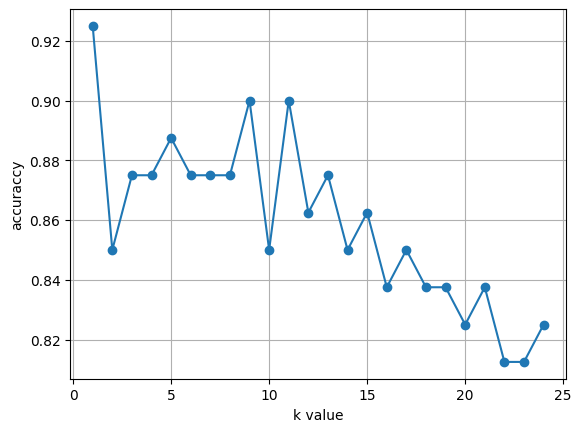

In [ ]:
plt.plot(neighbors,metrics_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuraccy')
plt.grid()
plt.show()

In [ ]:
knnclass=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knnclass.fit(x_train,y_train)
knnpred=knnclass.predict(x_test)
print("Confusionmatrix :",confusion_matrix(y_test,knnpred))
print(accuracy_score(y_test,knnpred))
print(f1_score(y_test,knnpred))
print(recall_score(y_test,knnpred))


Confusionmatrix : [[48  4]
 [ 6 22]]
0.875
0.8148148148148148
0.7857142857142857


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naviemodel=GaussianNB()
naviemodel.fit(x_train,y_train)
naviepred=naviemodel.predict(x_test)
print(confusion_matrix(y_test,naviepred))
print(accuracy_score(y_test,naviepred))
print(f1_score(y_test,naviepred))
print(recall_score(y_test,naviepred))



[[47  5]
 [ 4 24]]
0.8875
0.8421052631578947
0.8571428571428571
